# **Amazon stars reviews prediction - NLP**
## **Clasificación Multiclase Direccionada**
            
            


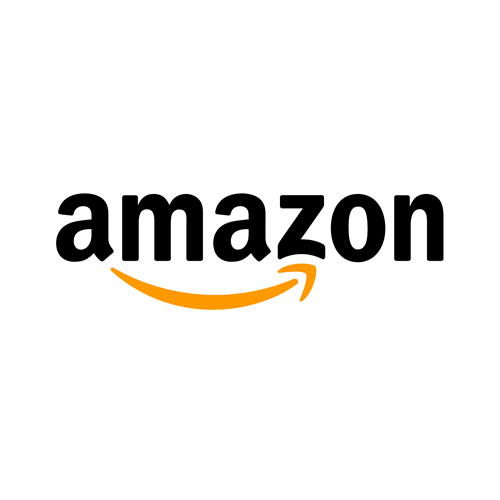

Este proyecto tiene como fin, profundizar en las conclusiones dispuestas en mi proyecto ["Amazon-Stars-Reviews-Project"](https://github.com/Naquiao/Amazon-Stars-Reviews-Project).

Dicho esto, cabe destacar que se utilizará el mismo [Dataset](https://drive.google.com/uc?export=download&id=11XnXB7Ubgf3t6gotXGlM4FCwPOMHhDLX) provisto por [The Multilingual Amazon Reviews Corpus](https://registry.opendata.aws/amazon-reviews-ml/).

---



El objetivo de este proyecto es sustancialmente el mismo; crear un modelo qué, en base a la reseña de un producto, prediga cuantas estrellas tendrá el mismo. 


# **Resumen del proyecto anterior**

En el proyecto se utilizaron las bases de datos anteriormente mencionadas para crear el modelo. Se siguió un pipeline de trabajo que tiene la siguiente esquema:



1.   `Normalización`
2.   `Vectorización`
3.   `Modelo`

En la etapa de **Normalización**, se realizó la limpieza del dataset. Se utilizaron funciones de limpieza tales como: Eliminación de RegEx, eliminación de tildes, eliminación de emojis y emoticones, eliminación de Stopwords y palabras menores a 3 letras.

Una vez aplicadas estas funciones,se obtuvieron los comentarios normalizados (o comentarios limpios). A partir de estos comentarios limpios se crearon dos features debido a tecnicas de normalización especiales :


*   El primero fue la aplicación de SnowballStemmer de la librería NLTK, en donde se hizo el proceso de Stemming sobre los comentarios normalizados.
*   El segundo, fue la Lematización de los comentarios normalizados a partir de la librería spaCy.

En conclusión de esta etapa, se obtuvieron 3 columnas: 


**A.   Comentarios Normalizados**

**B.   Comentarios Stematizados**

**C.   Comentarios Lematizados**

En la etapa 2, de **Vectorización**, se probaron 5 modelos diferentes de bag of words.

1.   `Count Vectorizer`
2.   `TF`
3. `TF - IDF: Uni-grama`
4. `TF - IDF: Uni-grama + Bi-grama`
5. `TF - IDF: Bi-grama`

Los mejores resultados se presentaron en TF - IDF de unigramas y bigramas, seguido del método TF (TF-IDF sin la penalización del IDF).

En la última etapa se definió un modelo benchmark, un clasificador Naive Bayes Gaussiano. 

Se probaron otros dos modelos. Una máquina de soporte vectorial (Support Vector Machine) con un kernel linear (por ende, un LinearSVC de la librería scikit-learn) y un Random Forest. Se utilizaron los hiperparámetros por defecto en los 3 modelos. 

Se probaron los 3 tipos de comentarios para cada uno de los modelos. En donde las mejores métricas las tuvo el conjunto de datos normalizados ( a lo que llamamos en el proyecto Data-Clean o el nombre de la columna 'review_boddy'), el segundo lugar lo obtuvo los comentarios de la data stematizada.

Por lo tanto, se eligió el mejor modelo, que fúe el SVM lineal con los comentarios normalizados.

Se optimizaron los hiperparámetros del modelo mediante tecnica de Randomized Search y Grid Search. Y finalmente se hizo un cross-validation con 8 folds, en los cuales los resultados finales de nuestro modelo de clasificación multiclase fueron 49% del conjunto de test.

Por lo tanto, resultado final:

---




**CLASIFICACIÓN MULTICLASE:**

<font color='BLUE'>**ACCURACY PARA TRAIN: 50%**</font>

<font color='GREEN'>**ACCURACY PARA TEST: 49%**</font>











# **Planificación del proyecto**

1. **Clasificación Direccionada.**

Vamos a elegir 2 categorías de productos que sean de nicho ( bien específicas en cuanto a los productos que se encuentran en la categoría). 

La idea de esta selección, es quedarnos con dos datasets diferentes, cada uno sobre una temática diferene ( por ejemplo un dataset sobre productos de casa y otro dataset sobre productos de electrónica). 

La hipótesis de este problema se basa en la suposición de que existen palabra partículares para cada nicho de productos, en los cuales puede darse que un comentario X sea muy positivo para la categoría A, pero muy negativo para la categoría B. Por lo tanto, si se corrobora esta hipótesis, tendrémos un modelo multiclase para una categoría A y otro modelo multiclase para la categoría B, que va a tener un desempeño más alto que el modelo del proyecto anterior.




# **Clasificación Direccionada**

## Obtención de Datos

In [ ]:
# Importamos dataset de desarrollo
data_dev = pd.read_json('/content/drive/MyDrive/NLP PROJECT/dataset_es_dev.json', lines = True)
print("- Cantidad de filas del set de desarrollo:", data_dev.shape[0])

# Importamos dataset de entrenamiento
data_train = pd.read_json('/content/drive/MyDrive/NLP PROJECT/dataset_es_train.json', lines = True)
print("- Cantidad de filas del set de entrenamiento :", data_train.shape[0])

# Importamos dataset de prueba
data_test = pd.read_json('/content/drive/MyDrive/NLP PROJECT/dataset_es_test.json', lines = True)
print("- Cantidad de filas del set de prueba :", data_test.shape[0])

- Cantidad de filas del set de desarrollo: 5000
- Cantidad de filas del set de entrenamiento : 200000
- Cantidad de filas del set de prueba : 5000


In [ ]:
# Concatenamos todos
data = pd.concat([data_dev,data_train,data_test])
data = data.reset_index(drop=True)
data.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
209995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
209996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
209997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
209998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports
209999,es_0794544,product_es_0130307,reviewer_es_0651938,5,Pues este tipo de cascos si que son inalambric...,Auriculares sin cables de verdad,es,electronics


In [ ]:
# Liberamos espacio de memoria
del(data_dev)
del(data_train)
del(data_test)
gc.collect()

73

In [ ]:
print(data.shape)
data.head()

(210000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


## **Data Preprocessing**

In [ ]:
# Exploramos las categorías de productos 
data.product_category.value_counts()

home                        28328
wireless                    27208
toy                         14328
sports                      13856
pc                          11720
home_improvement            11468
electronics                 10899
beauty                       7707
automotive                   7495
kitchen                      7028
apparel                      6014
drugstore                    5778
book                         5528
furniture                    5481
baby_product                 5098
office_product               5010
lawn_and_garden              4449
other                        4131
pet_products                 3899
personal_care_appliances     3735
luggage                      3509
camera                       3180
shoes                        2886
digital_ebook_purchase       1936
video_games                  1818
jewelry                      1677
musical_instruments          1608
watch                        1567
industrial_supplies          1552
grocery       

**Elección de 2 categorías**: 


`' Kitchen '` y `' Beauty '`

In [ ]:
#Creamos un dataset de la categoría 'Kitchen'
kitchen = data[data['product_category']=='kitchen']

In [ ]:
#Vemos la cantidad sobre el total 
kitchen.stars.value_counts()/ kitchen.stars.value_counts().sum()

4    0.214570
1    0.198492
2    0.197638
5    0.197211
3    0.192089
Name: stars, dtype: float64

Vemos que están suficientemente balanceados los target de la categoría 'Kitchen'.

Text(0.5, 8.95999999999998, 'Estrellas')

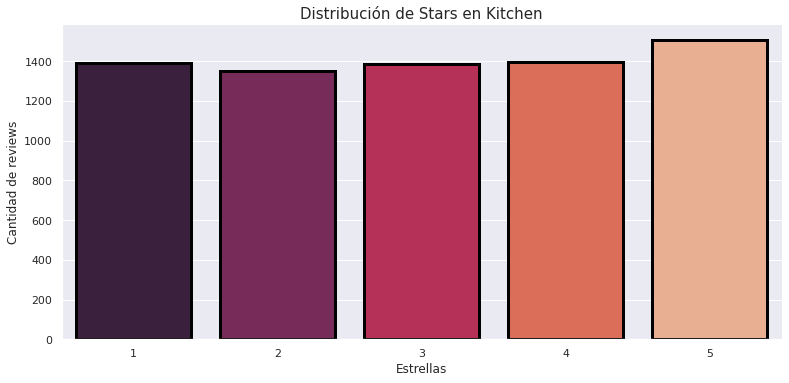

In [ ]:
sns.catplot(kitchen.stars.value_counts().index,
              kitchen.groupby('stars').review_id.agg('count'),
              data=kitchen,kind='bar',palette = 'rocket',
              height=5, aspect=18/8.27,edgecolor ='black',linewidth=3 )
plt.title('Distribución de Stars en Kitchen',fontsize=15)
plt.ylabel('Cantidad de reviews')
plt.xlabel('Estrellas')

In [ ]:
#Creamos un dataset de la categoría 'Beauty'
beauty = data[data['product_category']=='beauty']

In [ ]:
#Vemos la cantidad sobre el total 
beauty.stars.value_counts()/ beauty.stars.value_counts().sum()

1    0.209420
3    0.209290
2    0.208512
5    0.195147
4    0.177631
Name: stars, dtype: float64

Al igual que en la categoría 'Kitchen', las reviews están correctamente distribuidas. 

Text(0.5, 8.95999999999998, 'Estrellas')

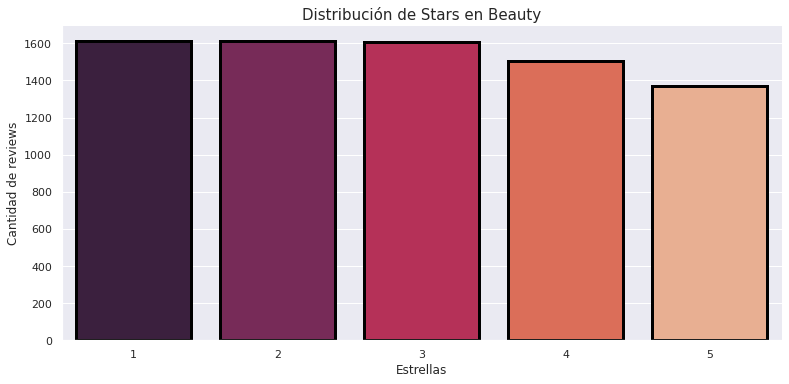

In [ ]:
sns.catplot(beauty.stars.value_counts().index,
              beauty.groupby('stars').review_id.agg('count'),
              data=beauty,kind='bar',palette = 'rocket',
              height=5, aspect=18/8.27,edgecolor ='black',linewidth=3 )
plt.title('Distribución de Stars en Beauty',fontsize=15)
plt.ylabel('Cantidad de reviews')
plt.xlabel('Estrellas')

Eliminamos todas las columnas que no vamos a utilizar en este análisis. 

In [ ]:
#Eliminamos columnas para beauty
beauty = beauty.drop(['review_id', 'product_id', 'reviewer_id',
                   'review_title', 'language', 'product_category'],
                   axis=1)

In [ ]:
#Eliminamos columnas para kitchen
kitchen = kitchen.drop(['review_id', 'product_id', 'reviewer_id',
                   'review_title', 'language', 'product_category'],
                   axis=1)

Reiniciamos los índices de ambos df

In [ ]:
beauty = beauty.reset_index(drop=True)

In [ ]:
kitchen = kitchen.reset_index(drop=True)

## **Normalización**

Siguiendo la línea del pipeline anterior, utilizaremos las mismas funciones de limpieza para normalizar el texto. 

A su vez, también obtendremos 3 tipos de features diferentes en función de la normalización aplicada.

### **1-Limpieza de texto**

**Beauty**

In [ ]:
# Limpiamos el df beauty
# Limpiamos el texto según las funciones definidas anteriormente.
beauty['review_body'] =  beauty['review_body'].apply(clean_text_round1)
beauty['review_body'] =  beauty['review_body'].apply(remove_emoji)
beauty['review_body'] =  beauty['review_body'].apply(remove_emoticons)
beauty['review_body'] =  beauty['review_body'].apply(basic_text_cleanup)
beauty['review_body'] =  beauty['review_body'].apply(eliminar_stopwords)

**Kitchen**

In [ ]:
# Limpiamos el df kitchen
# Limpiamos el texto según las funciones definidas anteriormente.
kitchen['review_body'] =  kitchen['review_body'].apply(clean_text_round1)
kitchen['review_body'] =  kitchen['review_body'].apply(remove_emoji)
kitchen['review_body'] =  kitchen['review_body'].apply(remove_emoticons)
kitchen['review_body'] =  kitchen['review_body'].apply(basic_text_cleanup)
kitchen['review_body'] =  kitchen['review_body'].apply(eliminar_stopwords)

### **2- Stemming**

**Beauty**

In [ ]:
df_stemm = beauty.copy()
df_stemm.head()

,stars,review_body
4,1,no gusta olor viejo aspecto malo
55,1,llevo cerca mes usandolo no hace efecto nada o...
129,1,pruducto no llega siempre no problema ahora pe...
204,1,no gusto nada nada precio
207,1,no llegado producto


In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [ ]:
comentario_list=[]
for comentario in df_stemm.review_body:
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    comentario=re.sub("[^a-zA-Z]"," ",str(comentario))
    # Pasamos todo a minúsculas
    comentario=comentario.lower()
    # Tokenizamos para separar las palabras del titular
    comentario=nltk.word_tokenize(comentario)
    ## Hasta acá Normalizamos, ahora a stemmizar
    # Aplicamos la funcion para buscar la raiz de las palabras
    comentario=[stemmer.stem(palabra) for palabra in comentario]
    # Por ultimo volvemos a unir el titular
    comentario=" ".join(comentario)
    
    # Vamos armando una lista con todos los comentarios
    comentario_list.append(comentario)

In [ ]:
df_stemm["review_body"] = comentario_list

In [ ]:
beauty['review_body_stemm']= df_stemm["review_body"]
beauty.head()

,stars,review_body,review_body_stemm
4,1,no gusta olor viejo aspecto malo,no gust olor viej aspect mal
55,1,llevo cerca mes usandolo no hace efecto nada o...,llev cerc mes usandol no hac efect nad olor mo...
129,1,pruducto no llega siempre no problema ahora pe...,pruduct no lleg siempr no problem ahor ped vez
204,1,no gusto nada nada precio,no gust nad nad preci
207,1,no llegado producto,no lleg product


**Kitchen**

In [ ]:
df_stemm = kitchen.copy()
df_stemm.head()

,stars,review_body
23,1,no gustado nada envien producto embalaje ningu...
29,1,demasiado grande dificil manejar limpiar deber...
36,1,conos dice trae no verdad regalo quede bastant...
50,1,malo no casi aire realmente baja calidad veces...
72,1,no tuesta rebanada manera uniforme parte super...


In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [ ]:
comentario_list=[]
for comentario in df_stemm.review_body:
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    comentario=re.sub("[^a-zA-Z]"," ",str(comentario))
    # Pasamos todo a minúsculas
    comentario=comentario.lower()
    # Tokenizamos para separar las palabras del titular
    comentario=nltk.word_tokenize(comentario)
    ## Hasta acá Normalizamos, ahora a stemmizar
    # Aplicamos la funcion para buscar la raiz de las palabras
    comentario=[stemmer.stem(palabra) for palabra in comentario]
    # Por ultimo volvemos a unir el titular
    comentario=" ".join(comentario)
    
    # Vamos armando una lista con todos los comentarios
    comentario_list.append(comentario)

In [ ]:
df_stemm["review_body"] = comentario_list

In [ ]:
kitchen['review_body_stemm']= df_stemm["review_body"]
kitchen.head()

,stars,review_body,review_body_stemm
23,1,no gustado nada envien producto embalaje ningu...,no gust nad envi product embalaj ningun tip in...
29,1,demasiado grande dificil manejar limpiar deber...,demasi grand dificil manej limpi deberi hab ca...
36,1,conos dice trae no verdad regalo quede bastant...,con dic tra no verd regal qued bastant mal verd
50,1,malo no casi aire realmente baja calidad veces...,mal no casi air realment baj calid vec barat s...
72,1,no tuesta rebanada manera uniforme parte super...,no tuest reban maner uniform part superior reb...


### **3- Lemmatization**

**Beauty**

In [ ]:
# Previamente
## !python -m spacy download es_core_news_sm
#Si bien ya lo hice antes, uno debe reiniciar el kernel cada vez que instala esta librería

import spacy # https://spacy.io/usage/models
nlp = spacy.load('es_core_news_sm')

#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)

# Quitamos de las stopwords palabras como 'no', 'bueno', 'buena' que nos pueden ser últiles para predecir
stopwords_spacy.remove('no') # En los comentarios negativos es muy repetida
stopwords_spacy.remove('bueno')
stopwords_spacy.remove('buena')
stopwords_spacy.remove('tarde')
stopwords_spacy.remove('temprano')
stopwords_spacy.remove('día')
stopwords_spacy.remove('días')
stopwords_spacy.remove('dia')
stopwords_spacy.remove('dias')
stopwords_spacy.remove('grandes')
stopwords_spacy.remove('general')

In [ ]:
#Constante de signos de puntuación
import string
puntua = string.punctuation + '¡¿...'
excluded_pos = ['SCONJ','CCONJ','NUM','PUNCT','PRON','DET','ADP','AUX','X']

In [ ]:
#Defino una función para lematizar
def text_data_lemma(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy and len(token.text)>2): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [ ]:
# Limpiamos todas las reviews con lemmatizer
%%time
reviews_lemma = []
for i in beauty.index:
  rev = text_data_lemma(beauty.review_body.iloc[i])
  reviews_lemma.append(" ".join(rev))
reviews_lemma[:5]

CPU times: user 12min 29s, sys: 8.89 s, total: 12min 38s
Wall time: 12min 36s


In [ ]:
#Creo DataFrame a partir de la lista
beauty_lemma = pd.DataFrame(reviews_lemma)

In [ ]:
# Almaceno el DF en formato csv dentro de mi Drive
beauty_lemma.to_csv('beauty_lemma.csv')
!cp beauty_lemma.csv '/content/drive/MyDrive/NLP PROJECT/beauty_lemma.csv'

In [ ]:
#Descargo desde Google Drive
beauty_lemma = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/beauty_lemma.csv')

In [ ]:
#Asigno nueva columna al df con el que vamos a trabajar
beauty['review_body_lemma']= beauty_lemma['0']
beauty.tail()

**Kitchen**

In [ ]:
# Limpiamos todas las reviews con lemmatizer
%%time
reviews_lemma = []
for i in kitchen.index:
  rev = text_data_lemma(kitchen.review_body.iloc[i])
  reviews_lemma.append(" ".join(rev))
reviews_lemma[:5]

CPU times: user 11min 23s, sys: 8.34 s, total: 11min 32s
Wall time: 11min 30s


In [ ]:
#Creo DataFrame a partir de la lista
kitchen_lemma = pd.DataFrame(reviews_lemma)

In [ ]:
# Almaceno el DF en formato csv dentro de mi Drive
kitchen_lemma.to_csv('kitchen_lemma.csv')
!cp kitchen_lemma.csv '/content/drive/MyDrive/NLP PROJECT/kitchen_lemma.csv'

In [ ]:
#Descargo desde Google Drive
kitchen_lemma = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/kitchen_lemma.csv')

In [ ]:
#Asigno nueva columna al df con el que vamos a trabajar
kitchen['review_body_lemma']= kitchen_lemma['0']
kitchen.tail()

### Data normalizada

Almaceno ambos dataset normalizados para futuras operaciones

In [ ]:
kitchen.head()

,stars,review_body,review_body_stemm,review_body_lemma
0,1,no gustado nada envien producto embalaje ningu...,no gust nad envi product embalaj ningun tip in...,gustar envien producto embalaje ningun tipo in...
1,1,demasiado grande dificil manejar limpiar deber...,demasi grand dificil manej limpi deberi hab ca...,grande dificil limpiar deberia cambiar tallar ...
2,1,conos dice trae no verdad regalo quede bastant...,con dic tra no verd regal qued bastant mal verd,cono traer regalar quedar
3,1,malo no casi aire realmente baja calidad veces...,mal no casi air realment baj calid vec barat s...,malo aire realmente bajo calidad barato salir ...
4,1,no tuesta rebanada manera uniforme parte super...,no tuest reban maner uniform part superior reb...,tostar rebanar uniformar superior rebanar qued...


**Beauty Normalizado**

In [ ]:
# Almaceno el DF en formato csv dentro de mi Drive
beauty.to_csv('beauty.csv')
!cp beauty.csv '/content/drive/MyDrive/NLP PROJECT/beauty.csv'

In [ ]:
#Descargo desde Google Drive
beauty = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/Proyecto 3: Clasificación Direccionada/beauty.csv')

Verifico que no tenga faltantes.

In [ ]:
beauty.isna().sum().sum()

9

In [ ]:
beauty= beauty.dropna()

In [ ]:
beauty.isna().sum().sum()

0

**Kichen Normalizado** 

In [ ]:
# Almaceno el DF en formato csv dentro de mi Drive
kitchen.to_csv('kitchen.csv')
!cp kitchen.csv '/content/drive/MyDrive/NLP PROJECT/kitchen.csv'

In [ ]:
#Descargo desde Google Drive
kitchen = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/Proyecto 3: Clasificación Direccionada/kitchen.csv')

Verifico que no tenga faltantes

In [ ]:
kitchen.isna().sum().sum()

11

In [ ]:
kitchen = kitchen.dropna()

In [ ]:
kitchen.isna().sum().sum()

0

## **Vectorización**

In [ ]:
# TT split
from sklearn.model_selection import train_test_split

#Pipeline
from sklearn.pipeline import Pipeline

# Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Modelos
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#Optimización hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### **Análisis del vectorizador**

Probaremos únicamente con el dataset de 'Beauty' y generalizaremos para el caso para el dataset de kitchen por semejanza dimensional. 

In [ ]:
# Data Cleaning
reviews = beauty['review_body'].values
stars = beauty['stars'].values

In [ ]:
#Train Test Split
X_train, X_test, ytrain, ytest = train_test_split(reviews,stars,test_size=0.3,
                                                  random_state=42,stratify=stars)

**1- CountVectorizer**

In [ ]:
# Se instancia el count vectorizer
# Se instancia el clasificador SVC lineal
# Se crea un pipeline para procesar lo anterior
clf = Pipeline([('CVec', CountVectorizer()), ('svc_clf', LinearSVC())], verbose=3)

# Se hace el ajuste sobre los datos de entrenamiento lematizados y sobre los datos de target de entrenamiento
model_fit = clf.fit(X_train, ytrain)

[Pipeline] .............. (step 1 of 2) Processing CVec, total=   0.1s
[Pipeline] ........... (step 2 of 2) Processing svc_clf, total=   0.5s


In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(ytest, y_pred))

acc_train = model_fit.score(X_train, ytrain)
print("Accuracy en train: ", round(acc_train,4))
y_pred = model_fit.predict(X_test)
acc_test = accuracy_score(y_pred, ytest)
print("Accuracy en test: ", round(acc_test,4))

              precision    recall  f1-score   support

           1       0.57      0.59      0.58       484
           2       0.33      0.31      0.32       482
           3       0.30      0.32      0.31       482
           4       0.31      0.33      0.32       411
           5       0.51      0.47      0.49       451

    accuracy                           0.40      2310
   macro avg       0.40      0.40      0.40      2310
weighted avg       0.41      0.40      0.40      2310

Accuracy en train:  0.9662
Accuracy en test:  0.4043


**2- TFIDF: Bigrama**

In [ ]:
# Se instancia TFIDF tomando en cuenta bigramas
# Se instancia el clasificador SVC lineal
# Se crea un pipeline con lo anterior
clf2 = Pipeline([('tfidf_ngram2', TfidfVectorizer(ngram_range=(2,2))), ('svc_clf2', LinearSVC())], verbose=3)

# Se hace el ajuste sobre los datos de entrenamiento lematizados y sobre los datos de target de entrenamiento
model_fit = clf2.fit(X_train, ytrain)

[Pipeline] ...... (step 1 of 2) Processing tfidf_ngram2, total=   0.3s
[Pipeline] .......... (step 2 of 2) Processing svc_clf2, total=   0.1s


In [ ]:
y_pred = clf2.predict(X_test)
print(classification_report(ytest, y_pred))

acc_train = model_fit.score(X_train, ytrain)
print("Accuracy en train: ", round(acc_train,4))
y_pred = model_fit.predict(X_test)
acc_test = accuracy_score(y_pred, ytest)
print("Accuracy en test: ", round(acc_test,4))

              precision    recall  f1-score   support

           1       0.56      0.56      0.56       484
           2       0.32      0.33      0.33       482
           3       0.32      0.25      0.28       482
           4       0.34      0.32      0.33       411
           5       0.42      0.52      0.46       451

    accuracy                           0.40      2310
   macro avg       0.39      0.40      0.39      2310
weighted avg       0.39      0.40      0.39      2310

Accuracy en train:  0.998
Accuracy en test:  0.3974


**3- TF-IDF: Unigrama**

In [ ]:
# Se instancia TF-IDF teniendo en cuenta unigramas 
# Se instancia el clasificador SVC lineal
# Se crea un pipeline para procesar lo anterior
clf = Pipeline([('tfidf', TfidfVectorizer()), ('svc_clf', LinearSVC())], verbose=3)

# Se hace el ajuste sobre los datos de entrenamiento lematizados y sobre los datos de target de entrenamiento
model_fit=clf.fit(X_train, ytrain)

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   0.1s
[Pipeline] ........... (step 2 of 2) Processing svc_clf, total=   0.1s


In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(ytest, y_pred))
acc_train = model_fit.score(X_train, ytrain)
print("Accuracy en train: ", round(acc_train,4))
y_pred = model_fit.predict(X_test)
acc_test = accuracy_score(y_pred, ytest)
print("Accuracy en test: ", round(acc_test,4))

              precision    recall  f1-score   support

           1       0.58      0.64      0.60       484
           2       0.34      0.32      0.33       482
           3       0.30      0.31      0.30       482
           4       0.33      0.31      0.32       411
           5       0.53      0.53      0.53       451

    accuracy                           0.42      2310
   macro avg       0.42      0.42      0.42      2310
weighted avg       0.42      0.42      0.42      2310

Accuracy en train:  0.9465
Accuracy en test:  0.4212


**4- TF**

In [ ]:
# Se instancia TF
# Se instancia el clasificador SVC lineal
# Se crea un pipeline para procesar lo anterior
clf = Pipeline([('CVec', TfidfVectorizer(use_idf=False, norm='l2')), ('svc_clf', LinearSVC())], verbose=3)

# Se hace el ajuste sobre los datos de entrenamiento lematizados y sobre los datos de target de entrenamiento
model_fit = clf.fit(X_train, ytrain)

[Pipeline] .............. (step 1 of 2) Processing CVec, total=   0.1s
[Pipeline] ........... (step 2 of 2) Processing svc_clf, total=   0.1s


In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(ytest, y_pred))

acc_train = model_fit.score(X_train, ytrain)
print("Accuracy en train: ", round(acc_train,4))
y_pred = model_fit.predict(X_test)
acc_test = accuracy_score(y_pred, ytest)
print("Accuracy en test: ", round(acc_test,4))

              precision    recall  f1-score   support

           1       0.60      0.66      0.63       484
           2       0.35      0.34      0.35       482
           3       0.31      0.30      0.31       482
           4       0.35      0.32      0.33       411
           5       0.54      0.54      0.54       451

    accuracy                           0.44      2310
   macro avg       0.43      0.43      0.43      2310
weighted avg       0.43      0.44      0.43      2310

Accuracy en train:  0.9003
Accuracy en test:  0.4359


**5- TF-IDF : Unigrama y Bigrama**

In [ ]:
# Se instancia TF-IDF tomando en cuenta unigramas y bigramas
# Se instancia el clasificador SVC lineal
# Se crea un pipeline para procesar lo anterior
clf1 = Pipeline([('tfidf_ngram', TfidfVectorizer(ngram_range=(1,2))), ('svc_clf1', LinearSVC())], verbose=3)

# Se hace el ajuste sobre los datos de entrenamiento lematizados y sobre los datos de target de entrenamiento
model_fit = clf1.fit(X_train, ytrain)

[Pipeline] ....... (step 1 of 2) Processing tfidf_ngram, total=   0.4s
[Pipeline] .......... (step 2 of 2) Processing svc_clf1, total=   0.2s


In [ ]:
y_pred = clf1.predict(X_test)
print(classification_report(ytest, y_pred))
acc_train = model_fit.score(X_train, ytrain)
print("Accuracy en train: ", round(acc_train,4))
y_pred = model_fit.predict(X_test)
acc_test = accuracy_score(y_pred, ytest)
print("Accuracy en test: ", round(acc_test,4))

              precision    recall  f1-score   support

           1       0.60      0.66      0.63       484
           2       0.38      0.37      0.38       482
           3       0.34      0.31      0.32       482
           4       0.37      0.36      0.36       411
           5       0.57      0.59      0.58       451

    accuracy                           0.46      2310
   macro avg       0.45      0.46      0.45      2310
weighted avg       0.45      0.46      0.46      2310

Accuracy en train:  0.9976
Accuracy en test:  0.4597


### **Vectorizador**

Si bien, vemos que los 5 vectorizadores estan en overfitting, elijo la métrica en test más alta. 

Por lo tanto, al igual que en el proyecto anterior, nos quedamos con un `TF-IDF de unigramas y bigramas.`

Definimos los conjuntos del dominio de Beauty. A su vez, también los vectorizadores según el tipo de feature (clean, stemmizado o lemmatizado). 

**Beauty**

In [ ]:
# Data Cleaning
reviews_cl_b= beauty['review_body'].values
stars_cl_b = beauty['stars'].values

# Stemming
reviews_st_b = beauty['review_body_stemm'].values
stars_st_b = beauty['stars'].values

#Lemmatization
reviews_le_b = beauty['review_body_lemma'].values
stars_le_b = beauty['stars'].values

In [ ]:
X_train_cl_b, X_test_cl_b, ytrain_cl_b, ytest_cl_b = train_test_split(reviews_cl_b,stars_cl_b,test_size=0.3,
                                                  random_state=42,stratify=stars_cl_b)

In [ ]:
X_train_st_b, X_test_st_b, ytrain_st_b, ytest_st_b = train_test_split(reviews_st_b,stars_st_b,test_size=0.3,
                                                  random_state=42,stratify=stars_st_b)

In [ ]:
X_train_le_b, X_test_le_b, ytrain_le_b, ytest_le_b = train_test_split(reviews_le_b,stars_le_b,test_size=0.3,
                                                  random_state=42,stratify=stars_le_b)

In [ ]:
tfidf_cl_b = TfidfVectorizer(max_features = 1250, ngram_range=(1,2))
tfidf_st_b = TfidfVectorizer(max_features = 150, ngram_range=(1,2))
tfidf_le_b = TfidfVectorizer(max_features = 250, ngram_range=(1,2))

**Kitchen**

In [ ]:
# Data Cleaning
reviews_cl_k= kitchen['review_body'].values
stars_cl_k = kitchen['stars'].values

# Stemming
reviews_st_k = kitchen['review_body_stemm'].values
stars_st_k = kitchen['stars'].values

#Lemmatization
reviews_le_k = kitchen['review_body_lemma'].values
stars_le_k = kitchen['stars'].values

In [ ]:
X_train_cl_k, X_test_cl_k, ytrain_cl_k, ytest_cl_k = train_test_split(reviews_cl_k,stars_cl_k,test_size=0.3,
                                                  random_state=42,stratify=stars_cl_k)

In [ ]:
X_train_st_k, X_test_st_k, ytrain_st_k, ytest_st_k = train_test_split(reviews_st_k,stars_st_k,test_size=0.3,
                                                  random_state=42,stratify=stars_st_k)

In [ ]:
X_train_le_k, X_test_le_k, ytrain_le_k, ytest_le_k = train_test_split(reviews_le_k,stars_le_k,test_size=0.3,
                                                  random_state=42,stratify=stars_le_k)

In [ ]:
tfidf_cl_k = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))
tfidf_st_k = TfidfVectorizer(max_features = 400, ngram_range=(1,2))
tfidf_le_k = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))

## **Modelo**

### Funciones de evaluación

In [ ]:
#Función para plotear la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    stars=['1','2','3','4','5']
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(stars)
    ax.set_yticklabels(stars)
    plt.show()

    return

In [ ]:
def evaluar_modelo(model_fit, X_train, X_test, y_train, y_test):
    print(model_fit)
    acc_train = model_fit.score(X_train, y_train)
    print("Accuracy en train: ", round(acc_train,4))
    y_pred = model_fit.predict(X_test)
    acc_test = accuracy_score(y_pred, y_test)
    print("Accuracy en test: ", round(acc_test,4))

    print(classification_report(y_test, y_pred))
    confusion(y_test, y_pred)
    return  acc_train, acc_test

In [ ]:
def evaluar_modelo_simple(model_fit, X_train, X_test, y_train, y_test):
    print(model_fit)
    acc_train = model_fit.score(X_train, y_train)
    print("Accuracy en train: ", round(acc_train,4))
    y_pred = model_fit.predict(X_test)
    acc_test = accuracy_score(y_pred, y_test)
    print("Accuracy en test: ", round(acc_test,4))

    print(classification_report(y_test, y_pred))
    return  acc_train, acc_test

### **Beauty** - Modelos para cada tipo de dato

**Beauty: Data Clean**

In [ ]:
#Definimos el vectorizador para Data_Clean ('review_body')
tfidf_cl_b = tfidf_cl_b.fit(X_train_cl_b)
X_train_cl_b = tfidf_cl_b.transform(X_train_cl_b).toarray()
X_test_cl_b = tfidf_cl_b.transform(X_test_cl_b).toarray()

**Naive Bayes: Benchmark**

In [ ]:
clf = GaussianNB()
clf.fit(X_train_cl_b,ytrain_cl_b)
evaluar_modelo_simple(clf ,X_train_cl_b ,X_test_cl_b ,ytrain_cl_b ,ytest_cl_b)

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.5295
Accuracy en test:  0.3857
              precision    recall  f1-score   support

           1       0.50      0.70      0.59       484
           2       0.37      0.09      0.15       482
           3       0.29      0.09      0.14       482
           4       0.25      0.31      0.28       411
           5       0.39      0.74      0.51       451

    accuracy                           0.39      2310
   macro avg       0.36      0.39      0.33      2310
weighted avg       0.36      0.39      0.33      2310



(0.529510022271715, 0.38571428571428573)

**Linear SVC** 

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_cl_b,ytrain_cl_b)
evaluar_modelo_simple(clf ,X_train_cl_b ,X_test_cl_b ,ytrain_cl_b ,ytest_cl_b)

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.7955
Accuracy en test:  0.4203
              precision    recall  f1-score   support

           1       0.57      0.61      0.59       484
           2       0.35      0.34      0.34       482
           3       0.31      0.32      0.32       482
           4       0.36      0.36      0.36       411
           5       0.50      0.47      0.48       451

    accuracy                           0.42      2310
   macro avg       0.42      0.42      0.42      2310
weighted avg       0.42      0.42      0.42      2310



(0.7954714179658501, 0.42034632034632036)

**Random Forest**

In [ ]:
clf = RandomForestClassifier(max_depth= 14)
clf.fit(X_train_cl_b,ytrain_cl_b)
evaluar_modelo_simple(clf ,X_train_cl_b ,X_test_cl_b ,ytrain_cl_b ,ytest_cl_b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.6663
Accuracy en test:  0.4342
              precision    recall  f1-score   support

           1       0.56      0.66      0.60       484
           2       0.35      0.31      0.33       482
           3       0.34      0.37      0.35       482
           4       0.43      0.16      0.23       411
           5       0.46      0.65      0.54       451

    accuracy                           0.43      2310
   macro avg       0.4

(0.6662954714179659, 0.4341991341991342)

**Beauty: Data Stemmizada**

In [ ]:
#Definimos el vectorizador para Data_Stemmatizasa ('review_body_stemm')
tfidf_st_b = tfidf_st_b.fit(X_train_st_b)
X_train_st_b = tfidf_st_b.transform(X_train_st_b).toarray()
X_test_st_b = tfidf_st_b.transform(X_test_st_b).toarray()

**Naive Bayes**

In [ ]:
clf = GaussianNB()
clf.fit(X_train_st_b,ytrain_st_b)
evaluar_modelo_simple(clf ,X_train_st_b ,X_test_st_b ,ytrain_st_b ,ytest_st_b)

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.4519
Accuracy en test:  0.4225
              precision    recall  f1-score   support

           1       0.53      0.69      0.60       484
           2       0.33      0.21      0.26       482
           3       0.35      0.24      0.29       482
           4       0.34      0.33      0.34       411
           5       0.45      0.64      0.53       451

    accuracy                           0.42      2310
   macro avg       0.40      0.42      0.40      2310
weighted avg       0.40      0.42      0.40      2310



(0.45193021529324423, 0.4225108225108225)

**Linear SVC**

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_st_b,ytrain_st_b)
evaluar_modelo_simple(clf ,X_train_st_b ,X_test_st_b ,ytrain_st_b ,ytest_st_b)

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.5004
Accuracy en test:  0.4476
              precision    recall  f1-score   support

           1       0.54      0.73      0.62       484
           2       0.38      0.30      0.34       482
           3       0.35      0.29      0.32       482
           4       0.38      0.32      0.35       411
           5       0.51      0.58      0.54       451

    accuracy                           0.45      2310
   macro avg       0.43      0.45      0.43      2310
weighted avg       0.43      0.45      0.43      2310



(0.5003711952487008, 0.44761904761904764)

**Random Forest** 

In [ ]:
clf = RandomForestClassifier(max_depth= 14)
clf.fit(X_train_st_b,ytrain_st_b)
evaluar_modelo_simple(clf ,X_train_st_b ,X_test_st_b ,ytrain_st_b ,ytest_st_b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.7142
Accuracy en test:  0.4268
              precision    recall  f1-score   support

           1       0.57      0.64      0.60       484
           2       0.36      0.35      0.36       482
           3       0.36      0.24      0.29       482
           4       0.34      0.27      0.30       411
           5       0.43      0.62      0.51       451

    accuracy                           0.43      2310
   macro avg       0.4

(0.7141796585003712, 0.42683982683982685)

**Beauty: Data Lemmatizada** 

In [ ]:
#Definimos el vectorizador para Data_Stemmatizasa ('review_body_stemm')
tfidf_le_b = tfidf_le_b.fit(X_train_le_b)
X_train_le_b = tfidf_le_b.transform(X_train_le_b).toarray()
X_test_le_b = tfidf_le_b.transform(X_test_le_b).toarray()

**Naive Bayes**

In [ ]:
clf = GaussianNB()
clf.fit(X_train_le_b,ytrain_le_b)
evaluar_modelo_simple(clf ,X_train_le_b ,X_test_le_b ,ytrain_le_b ,ytest_le_b)

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.4265
Accuracy en test:  0.3727
              precision    recall  f1-score   support

           1       0.44      0.66      0.53       484
           2       0.32      0.18      0.23       482
           3       0.33      0.16      0.22       482
           4       0.30      0.33      0.31       411
           5       0.39      0.54      0.45       451

    accuracy                           0.37      2310
   macro avg       0.36      0.37      0.35      2310
weighted avg       0.36      0.37      0.35      2310



(0.4265033407572383, 0.37272727272727274)

**Linear SVC**

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_le_b,ytrain_le_b)
evaluar_modelo_simple(clf ,X_train_le_b ,X_test_le_b ,ytrain_le_b ,ytest_le_b)

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.4837
Accuracy en test:  0.3883
              precision    recall  f1-score   support

           1       0.48      0.55      0.52       484
           2       0.33      0.30      0.32       482
           3       0.30      0.32      0.31       482
           4       0.32      0.25      0.28       411
           5       0.47      0.51      0.49       451

    accuracy                           0.39      2310
   macro avg       0.38      0.39      0.38      2310
weighted avg       0.38      0.39      0.38      2310



(0.48366740905716404, 0.38831168831168833)

**Random Forest**

In [ ]:
clf = RandomForestClassifier(max_depth= 14)
clf.fit(X_train_le_b,ytrain_le_b)
evaluar_modelo_simple(clf ,X_train_le_b ,X_test_le_b ,ytrain_le_b ,ytest_le_b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.5872
Accuracy en test:  0.3732
              precision    recall  f1-score   support

           1       0.52      0.50      0.51       484
           2       0.28      0.50      0.36       482
           3       0.29      0.29      0.29       482
           4       0.37      0.10      0.16       411
           5       0.49      0.43      0.46       451

    accuracy                           0.37      2310
   macro avg       0.3

(0.5872308834446919, 0.37316017316017314)

### **Kitchen - Modelos para cada tipo de dato**

**Kitchen - Data clean**

In [ ]:
#Definimos el vectorizador para Data_Clean ('review_body')
tfidf_cl_k = tfidf_cl_k.fit(X_train_cl_k)
X_train_cl_k = tfidf_cl_k.transform(X_train_cl_k).toarray()
X_test_cl_k = tfidf_cl_k.transform(X_test_cl_k).toarray()

**Naive Bayes: Benchmark**

In [ ]:
clf = GaussianNB()
clf.fit(X_train_cl_k,ytrain_cl_k)
evaluar_modelo_simple(clf ,X_train_cl_k ,X_test_cl_k ,ytrain_cl_k ,ytest_cl_k)

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.4966
Accuracy en test:  0.3632
              precision    recall  f1-score   support

           1       0.45      0.66      0.54       419
           2       0.31      0.08      0.12       417
           3       0.32      0.16      0.21       404
           4       0.29      0.15      0.19       451
           5       0.34      0.79      0.47       415

    accuracy                           0.36      2106
   macro avg       0.34      0.37      0.31      2106
weighted avg       0.34      0.36      0.31      2106



(0.49664019547953575, 0.36324786324786323)

**Linear SVC** 

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_cl_k,ytrain_cl_k)
evaluar_modelo_simple(clf ,X_train_cl_k ,X_test_cl_k ,ytrain_cl_k ,ytest_cl_k)

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.7363
Accuracy en test:  0.368
              precision    recall  f1-score   support

           1       0.48      0.47      0.48       419
           2       0.28      0.29      0.28       417
           3       0.28      0.27      0.28       404
           4       0.34      0.33      0.33       451
           5       0.45      0.47      0.46       415

    accuracy                           0.37      2106
   macro avg       0.37      0.37      0.37      2106
weighted avg       0.37      0.37      0.37      2106



(0.7363062512726533, 0.36799620132953464)

**Random Forest**

In [ ]:
clf = RandomForestClassifier(max_depth= 14)
clf.fit(X_train_cl_k,ytrain_cl_k)
evaluar_modelo_simple(clf ,X_train_cl_k ,X_test_cl_k ,ytrain_cl_k ,ytest_cl_k)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.664
Accuracy en test:  0.3875
              precision    recall  f1-score   support

           1       0.49      0.61      0.54       419
           2       0.30      0.24      0.27       417
           3       0.37      0.09      0.15       404
           4       0.29      0.47      0.36       451
           5       0.50      0.51      0.50       415

    accuracy                           0.39      2106
   macro avg       0.39

(0.6640195479535737, 0.38746438746438744)

**Kitchen: Data Stemmizada**

In [ ]:
#Definimos el vectorizador para Data_Stemmatizasa ('review_body_stemm')
tfidf_st_k = tfidf_st_k.fit(X_train_st_k)
X_train_st_k = tfidf_st_k.transform(X_train_st_k).toarray()
X_test_st_k = tfidf_st_k.transform(X_test_st_k).toarray()

**Naive Bayes**

In [ ]:
clf = GaussianNB()
clf.fit(X_train_st_k,ytrain_st_k)
evaluar_modelo_simple(clf ,X_train_st_k ,X_test_st_k ,ytrain_st_k ,ytest_st_k)

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.4655
Accuracy en test:  0.3761
              precision    recall  f1-score   support

           1       0.45      0.63      0.53       419
           2       0.36      0.18      0.24       417
           3       0.36      0.19      0.25       404
           4       0.32      0.17      0.22       451
           5       0.35      0.73      0.47       415

    accuracy                           0.38      2106
   macro avg       0.37      0.38      0.34      2106
weighted avg       0.37      0.38      0.34      2106



(0.4654856444715944, 0.37606837606837606)

**Linear SVC**

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_st_k,ytrain_st_k)
evaluar_modelo_simple(clf ,X_train_st_k ,X_test_st_k ,ytrain_st_k ,ytest_st_k)

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.584
Accuracy en test:  0.4179
              precision    recall  f1-score   support

           1       0.50      0.56      0.53       419
           2       0.32      0.29      0.30       417
           3       0.34      0.29      0.31       404
           4       0.37      0.37      0.37       451
           5       0.51      0.58      0.54       415

    accuracy                           0.42      2106
   macro avg       0.41      0.42      0.41      2106
weighted avg       0.41      0.42      0.41      2106



(0.5839951130116066, 0.4178537511870845)

**Random Forest** 

In [ ]:
clf = RandomForestClassifier(max_depth= 14)
clf.fit(X_train_st_k,ytrain_st_k)
evaluar_modelo_simple(clf ,X_train_st_k ,X_test_st_k ,ytrain_st_k ,ytest_st_k)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.6958
Accuracy en test:  0.4069
              precision    recall  f1-score   support

           1       0.50      0.62      0.55       419
           2       0.31      0.24      0.27       417
           3       0.37      0.13      0.19       404
           4       0.32      0.48      0.38       451
           5       0.52      0.55      0.53       415

    accuracy                           0.41      2106
   macro avg       0.4

(0.6957849725106903, 0.4069325735992403)

**Beauty: Data Lemmatizada** 

In [ ]:
#Definimos el vectorizador para Data_Stemmatizasa ('review_body_stemm')
tfidf_le_k = tfidf_le_k.fit(X_train_le_k)
X_train_le_k = tfidf_le_k.transform(X_train_le_k).toarray()
X_test_le_k = tfidf_le_k.transform(X_test_le_k).toarray()

**Naive Bayes**

In [ ]:
clf = GaussianNB()
clf.fit(X_train_le_k,ytrain_le_k)
evaluar_modelo_simple(clf ,X_train_le_k ,X_test_le_k ,ytrain_le_k ,ytest_le_k)

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.4681
Accuracy en test:  0.3172
              precision    recall  f1-score   support

           1       0.39      0.56      0.46       419
           2       0.26      0.05      0.08       417
           3       0.27      0.10      0.14       404
           4       0.26      0.13      0.17       451
           5       0.30      0.76      0.43       415

    accuracy                           0.32      2106
   macro avg       0.30      0.32      0.26      2106
weighted avg       0.30      0.32      0.26      2106



(0.46813276318468744, 0.31718898385565053)

**Linear SVC**

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_le_k,ytrain_le_k)
evaluar_modelo_simple(clf ,X_train_le_k ,X_test_le_k ,ytrain_le_k ,ytest_le_k)

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.6929
Accuracy en test:  0.3661
              precision    recall  f1-score   support

           1       0.46      0.47      0.47       419
           2       0.29      0.26      0.28       417
           3       0.28      0.27      0.28       404
           4       0.34      0.35      0.35       451
           5       0.44      0.47      0.45       415

    accuracy                           0.37      2106
   macro avg       0.36      0.37      0.36      2106
weighted avg       0.36      0.37      0.36      2106



(0.6929342292812054, 0.3660968660968661)

**Random Forest**

In [ ]:
clf = RandomForestClassifier(max_depth= 14)
clf.fit(X_train_le_k,ytrain_le_k)
evaluar_modelo_simple(clf ,X_train_le_k ,X_test_le_k ,ytrain_le_k ,ytest_le_k)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.6333
Accuracy en test:  0.3694
              precision    recall  f1-score   support

           1       0.48      0.52      0.50       419
           2       0.28      0.17      0.21       417
           3       0.26      0.25      0.26       404
           4       0.32      0.42      0.36       451
           5       0.48      0.48      0.48       415

    accuracy                           0.37      2106
   macro avg       0.3

(0.6332722459784158, 0.3694207027540361)

### **Conclusión Modelos**

**Conclusiones**:

Fui cambiando el parámetro del vectorizador `'max_features'` para ir comparando los performance del modelo de cada tipo de data (clean, stemmizada o lemmatizada).

Las conclusiones fueron:


1.   A mayor `max_feature`, el modelo tiende a sobreajustarse ('overfitting') y las métricas de los modelos Naive Bayes y Linear SVC disminuyen.

**`Caso particular:`** Pasa lo contrario con el modelo de Radom Forest; a medida que aumentaba el `'max_feature'` el modelo tendía a generalizar mejor los datos y su performance en el conjunto de test. 

2. En cuanto a los modelos, los resultados obtenidos en el modelo de data <font color='deeppink'>**'Beauty'**</font>, el mejor modelo fue la máquina de soporte vectorial con kerneal lineal (Linear SVC) utilizando la data stematizada **(Vectorizador con `max_features` = 150)**


Se  obtuvo lo siguiente:


<font color='tomato'>**ACCURACY PARA TRAIN: 50%**</font>

<font color='lawngreen'>**ACCURACY PARA TEST: 44,7%**</font>


3. Por el otro lado, en la data <font color='red'>**'Kitchen'**</font>, el mejor modelo fue el Linear SVC con los datos stemmizados.**(Vectorizador con un `max_features` = 400)**

Se  obtuvo lo siguiente:


<font color='tomato'>**ACCURACY PARA TRAIN: 58,46%**</font>

<font color='lawngreen'>**ACCURACY PARA TEST: 41,88%**</font>

Ambos modelos, malos también, incluso peor que el modelo del proyecto anterior.

Voy a probar si optimizando los hiperparámetros mejora, sino, la hipótesis de esta parte del proyecto, queda invalidada.

### **Optimización de hiperparámetros - Beauty**




In [ ]:
#Grid Search 1
param_grid = {'C':[0.01,0.1,1,1.1]}
svcgs = LinearSVC()
model = GridSearchCV(svcgs, param_grid=param_grid,cv=18)
model.fit(X_train_st_b,ytrain_st_b)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'C': 0.1}
Mejor Score: 0.44617118791031835



In [ ]:
#Randomized Search 1
#fijamos seed = 0
svc_o = LinearSVC(dual = False,
                  random_state= 0)

#Parámetros para  RandomizedSearchCV
params = {  'penalty': ['l1', 'l2'],              #norma de regularizacion
             'loss' : ['hinge', 'squared_hinge'], #tipo función de pérdida
             'tol': [1e-3, 1e-4, 1e-5],           #tolerancia para el error
             'C': [10, 20, 50],                   #parámetro clave del modelo SVC
             'max_iter': [500, 1000]              #número máximo de iteraciones 
         }
                 
svc_rs = RandomizedSearchCV( estimator = svc_o, 
                             param_distributions = params, 
                             n_iter = 20, 
                             cv = 8,               #crossvalidation de 5-folds
                             scoring = 'accuracy'
                            )


svc_rs.fit(X_train_st_b,ytrain_st_b)

print('Los mejores parámetros son:', svc_rs.best_params_, '\n')
print('El mejor score es:', svc_rs.best_score_)

Los mejores parámetros son: {'tol': 0.001, 'penalty': 'l1', 'max_iter': 500, 'loss': 'squared_hinge', 'C': 10} 

El mejor score es: 0.45007930961503695


### **Optimización de hiperparámetros - Kitchen**

In [ ]:
#Grid Search 1
param_grid = {'C':[0.01,0.1,1,1.1]}
svcgs = LinearSVC()
model = GridSearchCV(svcgs, param_grid=param_grid,cv=18)
model.fit(X_train_st_k,ytrain_st_k)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'C': 0.01}
Mejor Score: 0.4475687710981828



In [ ]:
#Randomized Search 1
#fijamos seed = 0
svc_o = LinearSVC(dual = False,
                  random_state= 0)

#Parámetros para  RandomizedSearchCV
params = {  'penalty': ['l1', 'l2'],              #norma de regularizacion
             'loss' : ['hinge', 'squared_hinge'], #tipo función de pérdida
             'tol': [1e-3, 1e-4, 1e-5],           #tolerancia para el error
             'C': [0.01, 0.1, 1],                   #parámetro clave del modelo SVC
             'max_iter': [500, 1000]              #número máximo de iteraciones 
         }
                 
svc_rs = RandomizedSearchCV( estimator = svc_o, 
                             param_distributions = params, 
                             n_iter = 20, 
                             cv = 8,               #crossvalidation de 5-folds
                             scoring = 'accuracy'
                            )


svc_rs.fit(X_train_st_k,ytrain_st_k)

print('Los mejores parámetros son:', svc_rs.best_params_, '\n')
print('El mejor score es:', svc_rs.best_score_)

Los mejores parámetros son: {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 1000, 'loss': 'squared_hinge', 'C': 0.01} 

El mejor score es: 0.4461431471218071


### **Modelos Finales**

Para el dataset de `'Beauty'`, el mejor performance que se pudo lograr después de la optimización de hiperparámetros es el siguiente:

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)
Accuracy en train:  0.5004
Accuracy en test:  0.4459
              precision    recall  f1-score   support

           1       0.54      0.73      0.62       484
           2       0.37      0.30      0.33       482
           3       0.35      0.29      0.32       482
           4       0.37      0.32      0.34       411
           5       0.51      0.58      0.54       451

    accuracy                           0.45      2310
   macro avg       0.43      0.44      0.43      2310
weighted avg       0.43      0.45      0.43      2310



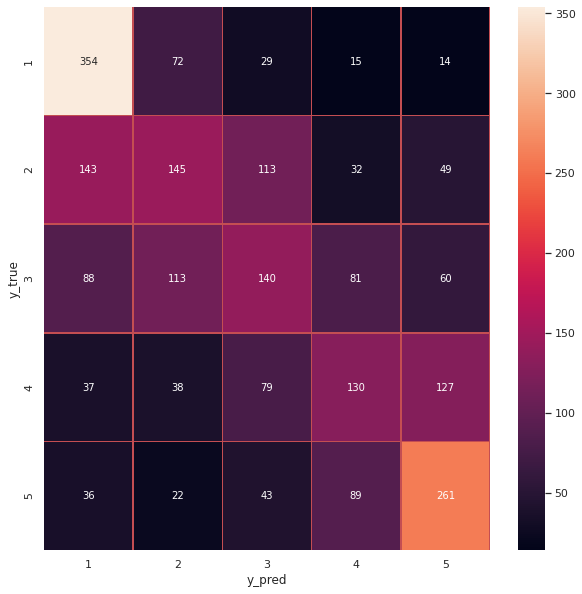

(0.5003711952487008, 0.4458874458874459)

In [ ]:
clf = LinearSVC(C = 10, max_iter= 500, tol=0.001, dual= False,penalty='l1',loss='squared_hinge')
clf.fit(X_train_st_b,ytrain_st_b)
evaluar_modelo(clf ,X_train_st_b ,X_test_st_b ,ytrain_st_b ,ytest_st_b)

In [ ]:
results = cross_validate(clf, X_train_st_b, ytrain_st_b, cv=50, return_train_score=True, scoring='accuracy', n_jobs=-1)
print('Mean r2 test: ', round(np.mean(results['test_score']),3))
print('Mean r2 train: ', round(np.mean(results['train_score']),3))

Mean r2 test:  0.446
Mean r2 train:  0.503


Para el Dataset de 'Kitchen':

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.5194
Accuracy en test:  0.4292
              precision    recall  f1-score   support

           1       0.48      0.69      0.57       419
           2       0.35      0.24      0.28       417
           3       0.35      0.16      0.22       404
           4       0.36      0.41      0.39       451
           5       0.50      0.63      0.56       415

    accuracy                           0.43      2106
   macro avg       0.41      0.43      0.40      2106
weighted avg       0.41      0.43      0.41      2106



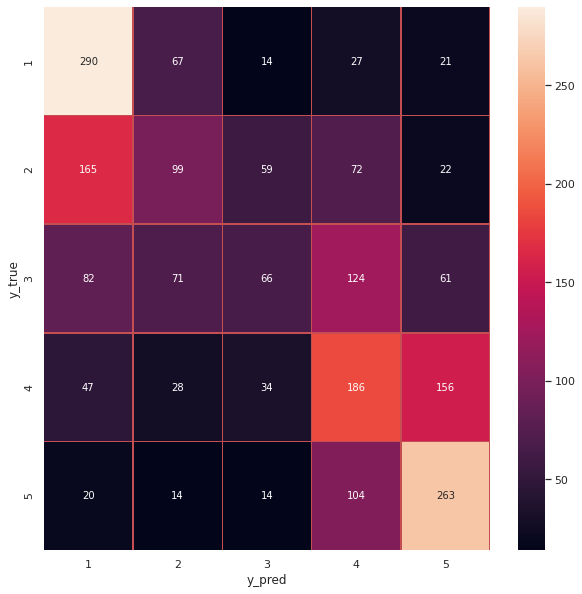

(0.5194461413154143, 0.42924976258309594)

In [ ]:
clf = LinearSVC(C = 0.01, max_iter= 500)
clf.fit(X_train_st_k,ytrain_st_k)
evaluar_modelo(clf ,X_train_st_k ,X_test_st_k ,ytrain_st_k ,ytest_st_k)

In [ ]:
results = cross_validate(clf, X_train_st_k, ytrain_st_k, cv=50, return_train_score=True, scoring='accuracy', n_jobs=-1)
print('Mean r2 test: ', round(np.mean(results['test_score']),3))
print('Mean r2 train: ', round(np.mean(results['train_score']),3))

Mean r2 test:  0.449
Mean r2 train:  0.52


## **Conclusión**

Luego de optimizar los hiperparámetros y hacer un cross-validation, tenemos una noción más robusta de como son las métricas reales de estos modelos. 

Para el dataset de **`'Beauty'`**:

<font color='tomato'>**ACCURACY PARA TRAIN: 48,4%**</font>

<font color='lawngreen'>**ACCURACY PARA TEST: 44,5%**</font>

Para el dataset de **`'Kitchen'`**:

<font color='tomato'>**ACCURACY PARA TRAIN: 52%**</font>

<font color='lawngreen'>**ACCURACY PARA TEST: 44,9%**</font>

Lamentablemente, no pude corroborar la hipótesis de esta parte del proyecto. Dehecho, se obtuvieron peores métricas que las del proyecto anterior.

**Recordar: Proyecto anterior**

<font color='cyan'>**ACCURACY PARA TRAIN: 50%**</font>

<font color='red'>**ACCURACY PARA TEST: 49%**</font>


Esto puede ser por dos razones: 



1.   El dataset es muy pequeño con respecto al original.
  
  Pensar en que el dataset original tenía 210.000 instancias. En cambio los dataset utilizados en este proyecto, fueron de 7.700 y 7.200 instancias respectivamente, es decir, un 3,6% del original.

  Esto evidencia una falta de robustes del modelo, que a su vez se va a traducir en un bajo performance para el conjunto de test. La única solución posible que se me ocurre es obtener mas instancias de cada clase para poder corroborar con más profundidad la hipótesis inicial.

2.  El modelo es malo por naturaleza, y el hecho de que existan ciertas palabras propias del corpus de 'Kitchen' por ejemplo, va  a crear un sobreajuste del conjunto de train, ya que le dará más valor a aquellas palabras que pertenecen al dominio de kitchen, mientras que, para aquellos comentarios que no tengan palabras 'especiales' de kitchen, no tendrá manera de que los clasifique adecuadamente. Por supuesto, esto se traduce en un bajo performance de test. 



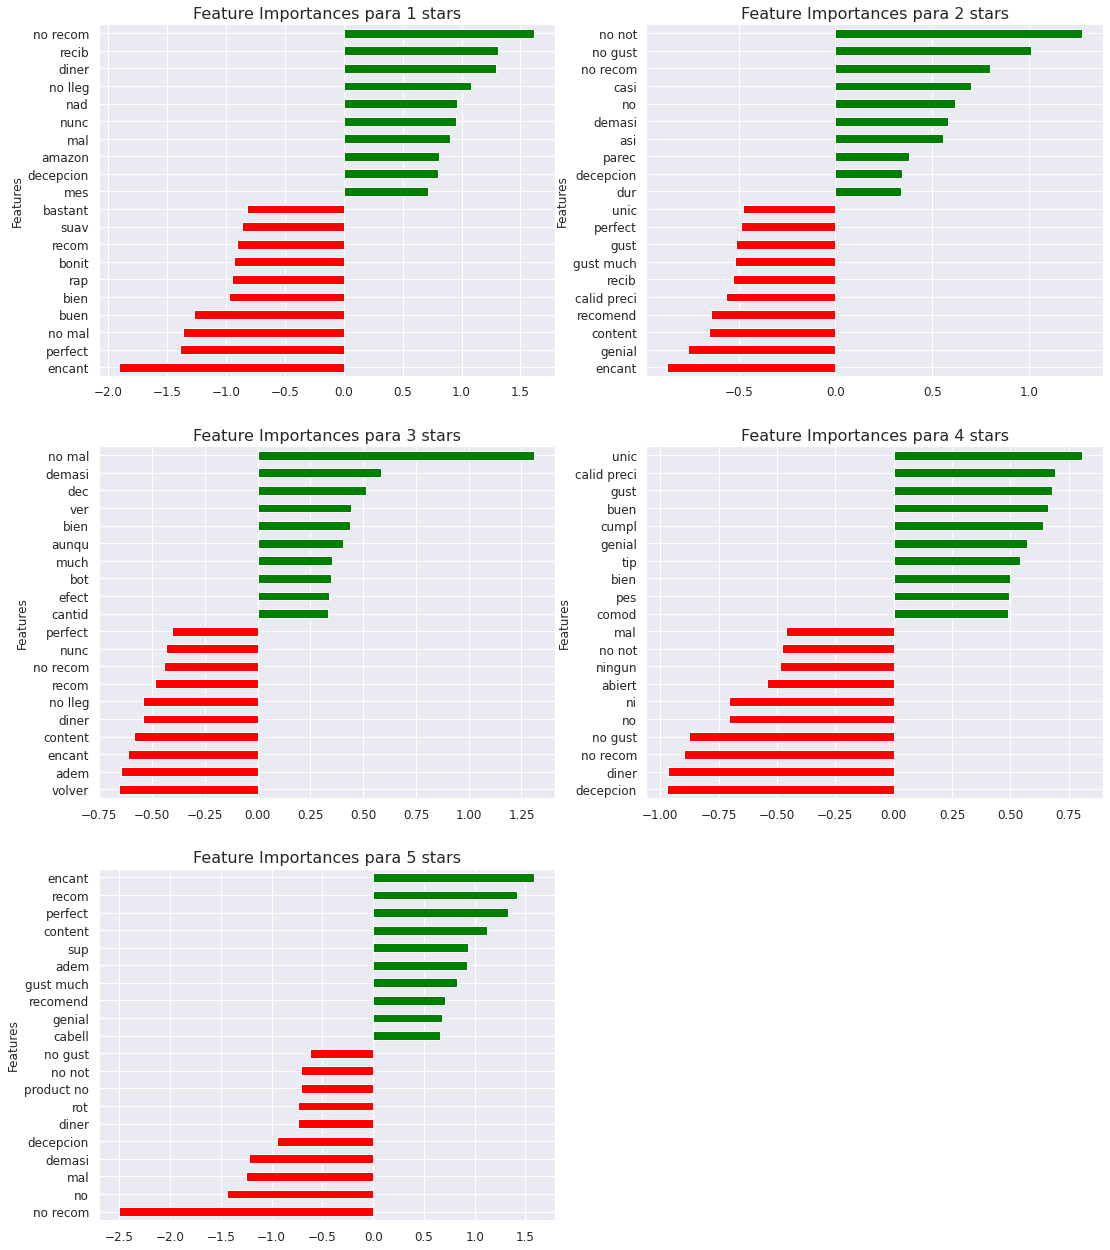

In [ ]:
plt.figure(figsize = (18,22))
all_words = tfidf_st_b.get_feature_names()
for n_star in range (0,5):
    
    coeff = list(clf.coef_[n_star])
    labels = list(all_words)

    features = pd.DataFrame()
    features['Features'] = labels
    features['Importance'] = coeff
    features = features.reset_index(drop=True)
    features_sort = features.sort_values(by=['Importance'], ascending=True)
    features_sort = features_sort.reset_index(drop=True)
    
    plt.subplot(3, 2, n_star+1)
    data_plot = pd.concat([features_sort.head(10), features_sort.tail(10)])
    data_plot.sort_values(by=['Importance'], ascending=True, inplace = True)
    data_plot['positive'] = data_plot['Importance'] > 0
    data_plot.set_index('Features', inplace = True)
    data_plot.Importance.plot(kind='barh', 
                              color = data_plot.positive.map({True: 'green', False: 'red'}),
                              fontsize=12)
    
    
    
    plt.title ('Importancia de los features ', fontsize=16)
    plt.title ('Feature Importances para ' + str(n_star+1) + ' stars', fontsize=16)
plt.show()